## Python notebook template block Adventure Work 
#### Your Name:
#### Your University/College/ Major
#### Your Email: 

As of now, you created a new notebook for your study with the related contents. However, when working on a project in the real life, all your data and code needs to be in one place for the project. Going forward in the block, all of the code that you generate with regard to the final project about AD should be in this one template. Go back to the code you wrote, evaluate if it is according to [PEP8](https://peps.python.org/pep-0008/) style guide and adjust where necessary. 

This template provides you with a natural flow through the steps of a traditional data science project. Do not forget to clearly add comments to your code. If you would like to add more stucture, add extra mark down blocks to explain what you are doing. 

⚠️Important! Before handing it in, run all of your code. All your cells need to show outputs. This is necessary for grading!⚠️


### Add imports here
When working in .py files, you usually have all your package imports at the top of your code. This makes it easy to get a good overview of the packages that you are using and importing. As of now, we are working in .ipynb, but it is good practice to already start implementing these structures. Add all the imports that you use in all of your code in the code block below. In this way, you do not need to add it in every cell.

In [32]:
# Add your package imports here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Load the data

After your package imports, you usually load your data. This is what you will be working with and what your code will be based on.

In [33]:
data = pd.read_excel("D:\ZJUT\S6\ML and Data Analysis Practice\D3\BikeBuyers2.xlsx")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProspectiveBuyerKey   2059 non-null   int64         
 1   ProspectAlternateKey  2059 non-null   int64         
 2   FirstName             2059 non-null   object        
 3   MiddleName            1207 non-null   object        
 4   LastName              2059 non-null   object        
 5   BirthDate             2059 non-null   datetime64[ns]
 6   MaritalStatus         2059 non-null   object        
 7   Gender                2059 non-null   object        
 8   EmailAddress          2059 non-null   object        
 9   YearlyIncome          1874 non-null   float64       
 10  TotalChildren         2018 non-null   float64       
 11  NumberChildrenAtHome  2059 non-null   int64         
 12  Education             2059 non-null   object        
 13  Occupation        

In [34]:
data.head()

,ProspectiveBuyerKey,ProspectAlternateKey,FirstName,MiddleName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,YearlyIncome,...,NumberCarsOwned,AddressLine1,AddressLine2,City,StateProvinceCode,PostalCode,Phone,Salutation,Amount,Category
0,1,21596444800,Adam,NaN,Alexander,1940-07-02,M,M,aalexander@lucernepublishing.com,40000.0,...,2.0,566 S. Main,NaN,Cedar City,UT,84720,516-555-0187,Mr.,0,Category 5
1,2,3003,Adrienne,NaN,Alonso,1944-09-06,M,F,aalonso@alpineskihouse.com,80000.0,...,2.0,7264 St. Peter Court,NaN,Colma,CA,94014,607-555-0119,Ms.,4,Category 3
2,3,1077,Alfredo,B,Alvarez,1958-10-01,S,M,aalvarez@fineartschool.net,130000.0,...,4.0,8850 Via Del Sol,NaN,Lynnwood,WA,98036,1 (11) 500 555-0143,Mr.,1,Category 4
3,4,4779,Arthur,A,Arun,1979-09-23,S,M,aarun@adventure-works.com,50000.0,...,2.0,7515 Royal Oak Rd.,NaN,Chula Vista,CA,91910,403-555-0186,Mr.,4,Category 1
4,5,38032399400,Andrea,M,Bailey,1959-10-28,M,F,abailey@lucernepublishing.com,10000.0,...,0.0,2500 North Stemmons Freeway,NaN,Dallas,TX,75201,1 (11) 500 555-0113,Ms.,4,Category 9


## Data Management and Understanding

### Data Cleansing
In the following section plug in all of your relevant python codes and explanations related to data cleansing. 

In [35]:
# add your code here for data cleaning of the adventure data set INCOME
data.isnull().any()

ProspectiveBuyerKey     False
ProspectAlternateKey    False
FirstName               False
MiddleName               True
LastName                False
BirthDate               False
MaritalStatus           False
Gender                  False
EmailAddress            False
YearlyIncome             True
TotalChildren            True
NumberChildrenAtHome    False
Education               False
Occupation              False
HouseOwnerFlag          False
NumberCarsOwned          True
AddressLine1            False
AddressLine2             True
City                    False
StateProvinceCode       False
PostalCode              False
Phone                   False
Salutation              False
Amount                  False
Category                False
dtype: bool

In [36]:
data.duplicated().any()

False

### Exploratory Data Analysis

Include all exploratory Data Analysis questions you studied in this section. 

In [37]:
# Add your exploratory data analysis of the NAC data here. You can add Mark Down blocks (or output f-strings) to provide explanations to your code, alongside comments made in your code. 
data.describe()

,ProspectiveBuyerKey,ProspectAlternateKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,PostalCode,Amount
count,2059.000000,2.059000e+03,1874.000000,2018.00000,2059.000000,2059.000000,1957.000000,2059.000000,2059.000000
mean,1030.000000,1.904516e+10,53110.992529,1.88553,1.048567,0.597377,1.548799,87420.840699,2.747936
std,594.526422,2.903412e+10,28870.561081,1.65589,1.538167,0.490545,1.149506,19922.592960,1.557480
min,1.000000,2.300000e+01,10000.000000,0.00000,0.000000,0.000000,0.000000,1906.000000,0.000000
25%,515.500000,3.762000e+03,30000.000000,0.00000,0.000000,0.000000,1.000000,91203.000000,1.000000
50%,1030.000000,8.219000e+03,50000.000000,2.00000,0.000000,1.000000,2.000000,94014.000000,4.000000
75%,1544.500000,3.527752e+10,70000.000000,3.00000,2.000000,1.000000,2.000000,98004.000000,4.000000
max,2059.000000,9.994441e+10,170000.000000,5.00000,5.000000,1.000000,4.000000,99362.000000,5.000000


In [38]:
# Check for any correlations
print(data.corr())

                      ProspectiveBuyerKey  ProspectAlternateKey  YearlyIncome  \
ProspectiveBuyerKey              1.000000             -0.000760     -0.002329   
ProspectAlternateKey            -0.000760              1.000000     -0.009713   
YearlyIncome                    -0.002329             -0.009713      1.000000   
TotalChildren                    0.025070              0.012543      0.187594   
NumberChildrenAtHome             0.028224             -0.062852      0.420791   
HouseOwnerFlag                  -0.056233             -0.007450      0.018235   
NumberCarsOwned                  0.017936             -0.033724      0.452740   
PostalCode                       0.014469              0.005846      0.017661   
Amount                          -0.018590             -0.030751      0.010206   

                      TotalChildren  NumberChildrenAtHome  HouseOwnerFlag  \
ProspectiveBuyerKey        0.025070              0.028224       -0.056233   
ProspectAlternateKey       0.012543

### Visualizations

Include all the visualizations you made in this section. Use the blocks below to enter the code for graphs you created with matplotlib (or seaborn, bokeh, or another visualization package). 

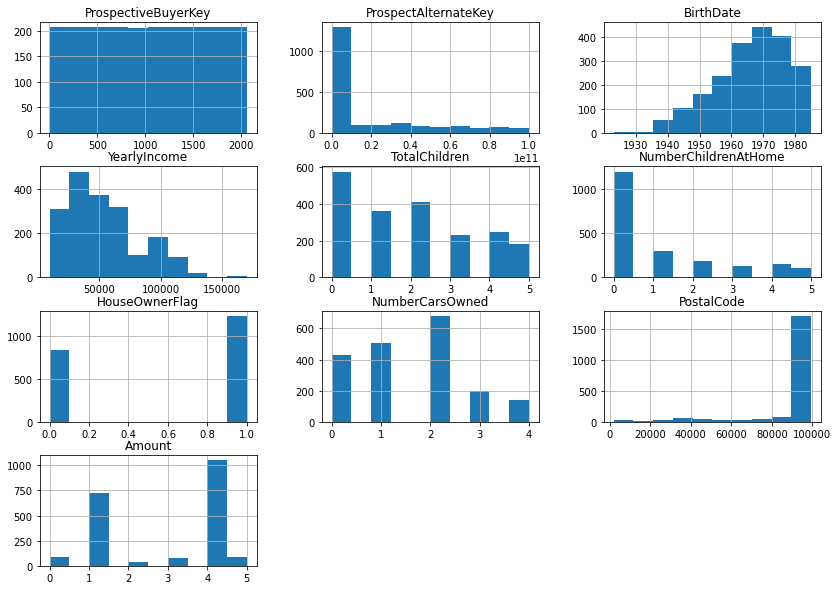

In [39]:
# Add visualizations here that you made to present insights in the adventure data. Create a new codeblock for every graph. Add markdown blocks to describe your graphs where necessary.
# Histograms for distribution
data.hist(figsize=(14, 10))
plt.show()

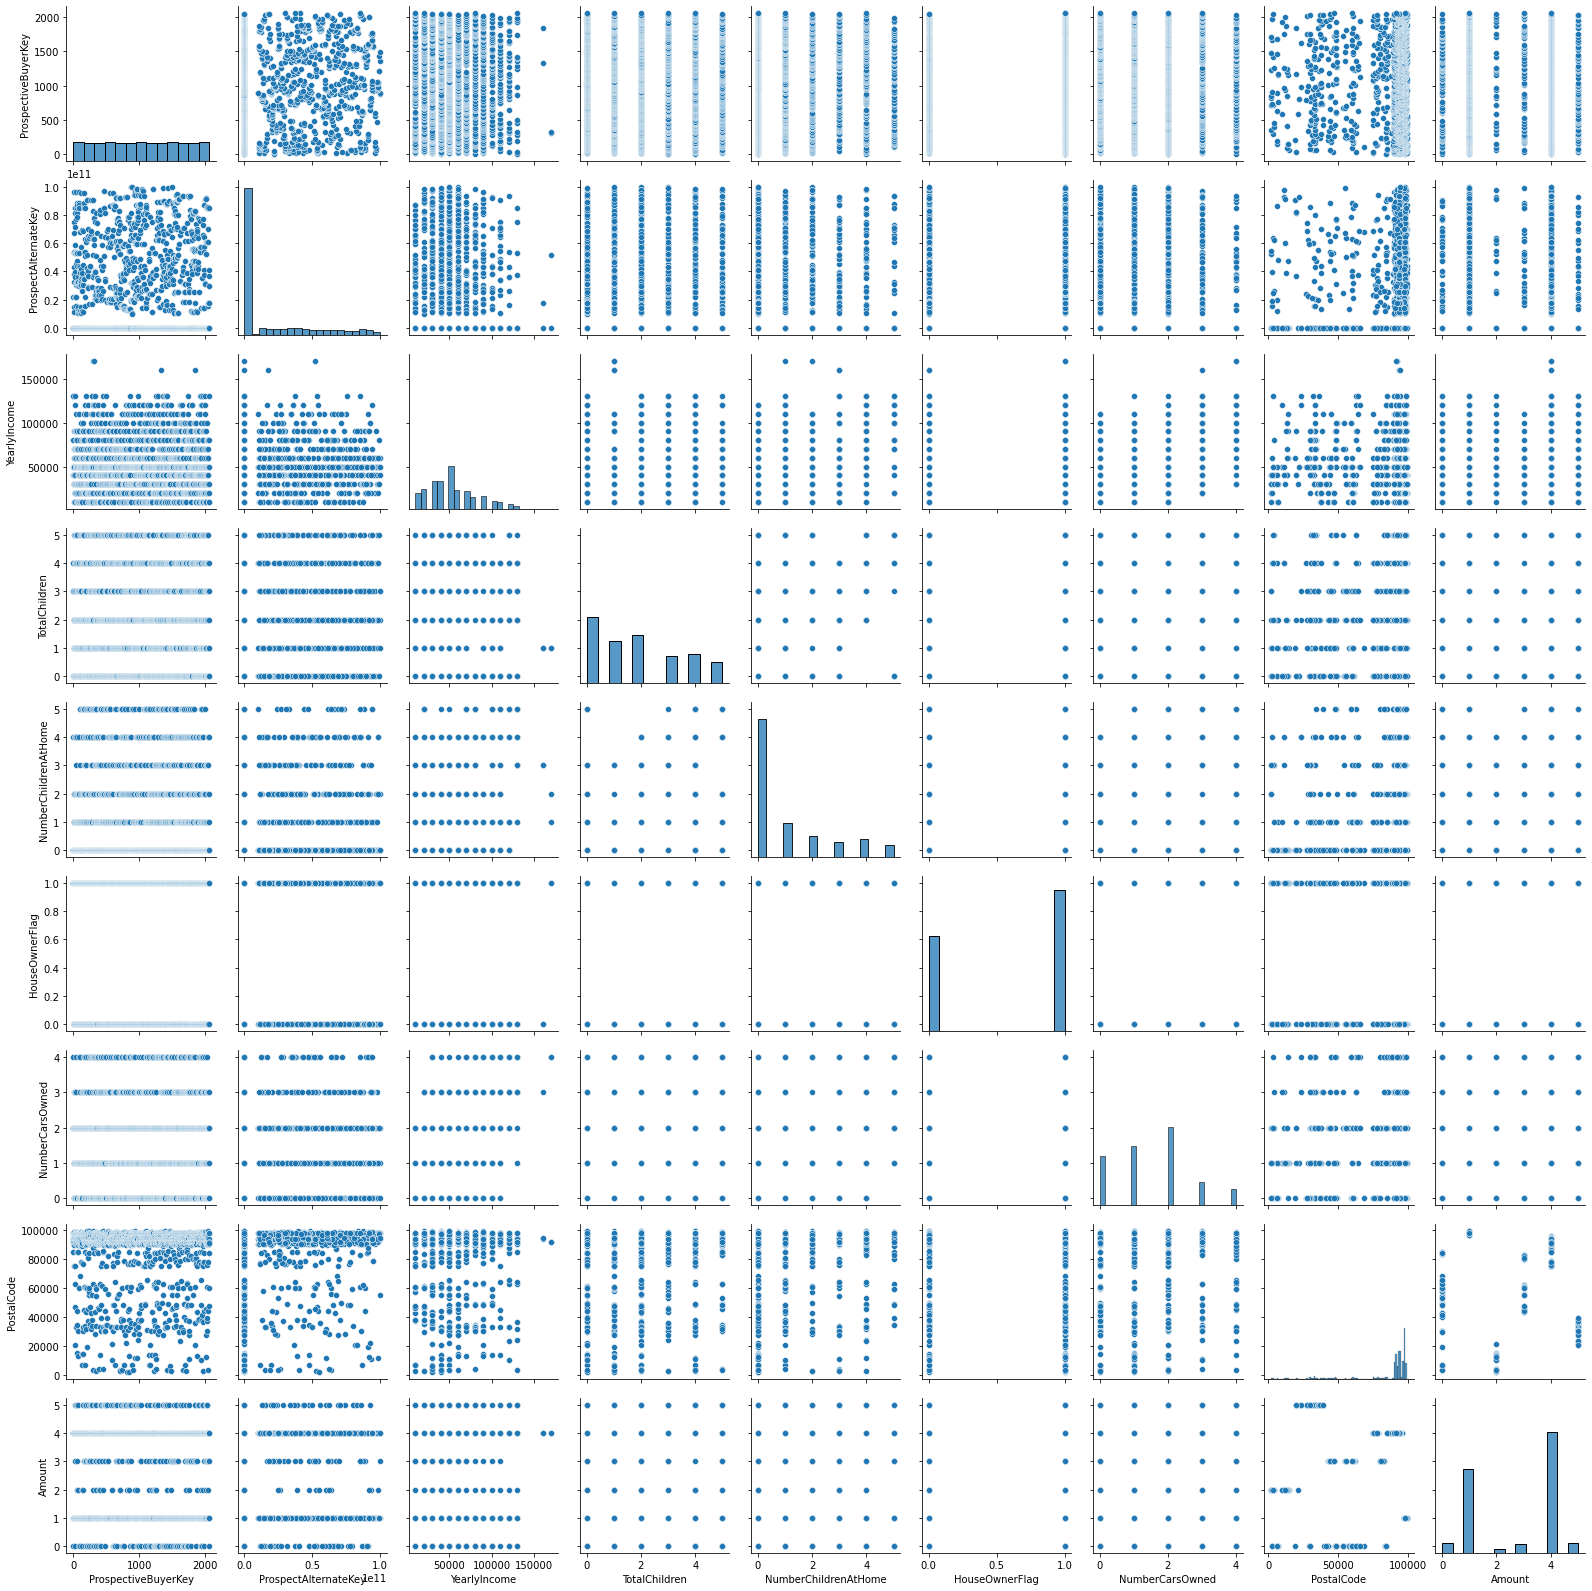

In [40]:
# Pairplot to see pairwise relationships
sns.pairplot(data)
plt.show()

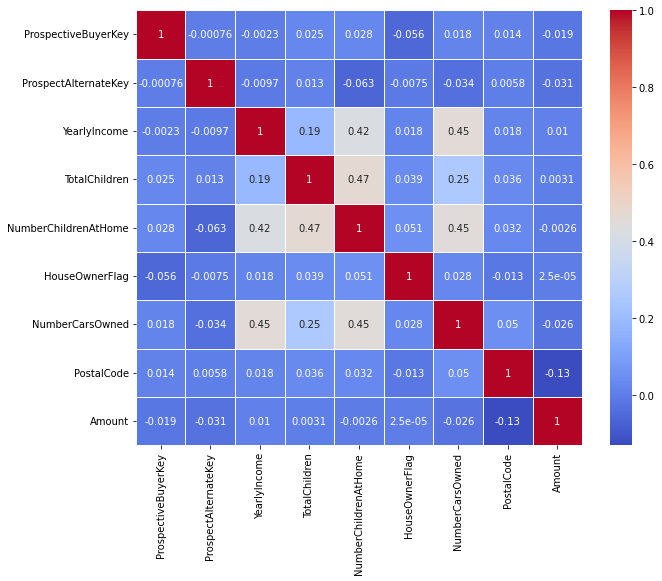

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

#### Correlation Analysis and Feature Selection

In [ ]:
# Enter your code here for your correlation analysis

In [ ]:
# Enter your code here for your feature selection. Add markdown comments for why you chose these features below.

✍️ I chose the features above because ...

## Machine Learning

### Identifying basic Machine Learning applications.
In the following subsection, show your understanding of each of the listed Machine Learning algorithms. Excecute these algorithms on the adventure dataset.

❗Remember! All your package imports should be on top of this notebook.

#### Simple machine learning modelling pipeline

In [ ]:
# Enter your code here for a simple machine learning modelling pipeline 

#### Linear regression

In [ ]:
# Enter your code here for linear regression

#### Logistic regression

In [ ]:
# Enter your code here for logistic regression

#### Tree-based model

In [ ]:
# Enter your code here for tree-based decision model

#### Gradient Boosting Trees and SVM

In [ ]:
# Enter your code here for Gradient Boosting

In [ ]:
# Enter your code here for SVM

#### Unsupervised learning with K-Means

In [ ]:
# Enter your code here for K-means

### Evaluating the performance of the model

In the following subsection include your Python code on how you evaluated your chosen model(s).

In [ ]:
# Enter your code here for the model evaluation. Add your interpretation in the markdown below.

✍️ Interpretation of the model evaluation: ...

### Improving the performance of the model

In the following subsection include your Python code on how you improved your chosen model(s). 

In [ ]:
# Add your code here for improving the model performance

✍️ I improved my model by ...

### Choose the best model

In the following subsection reflect on the most appropriate machine learning model. 

In [ ]:
# Add your code here for comparing your models. Describe in the markdown below why the model you chose is the best model.

✍️ The model is chose is the best because ...